In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1>Steps</h1>

<ol>
    <li>exploring dataset</li>    
    <li>some inferential and explorational analysis. some hypothesis testing</li>    
    <li>Addressing outliers</li>   
    <li>some extra exploration and hypothesis testing</li>
    <li>feature engineering</li>
    <li>models training</li>
    <li>select models for next level model</li>
    <li>feature selection</li>
    <li>find best model and submit</li>
</ol>

In [2]:
dataset = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
dataFrames = [dataset,test_df]

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Two missing value in Embarked, some missing value in Age and a lot of missing values in Cabin.
My Decision: I will remove the two records that have missing values in Embarked. I will try to interpolate the age missing values by finding its correlated features, and I will probably dismiss the Cabin feature altogether.

Before all that, I want tp explore the relationship of the features with our target 'Survived'.

## Pclass, Sex and Embarked

<br/>

In [7]:
dataset[['Survived','Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
dataset[['Survived','Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


### Adressing missing values in Embarked

<p>Before seeing the relationship between 'Embarked' and 'Survived', I need to take care of 'Embarked' missing values</p>

In [9]:
dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hansen, Mr. Henrik Juul",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"O'Connor, Mr. Patrick",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


<p>Of 891 passengers 644 of them has 'S' as their 'Embarked'. So if we replace our one missing value with 'S' we will probably( 644/891 = 72%) be correct. </p>

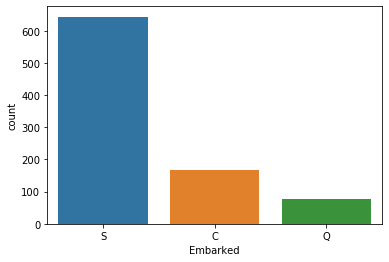

In [11]:
sns.countplot(data=dataset, x='Embarked')

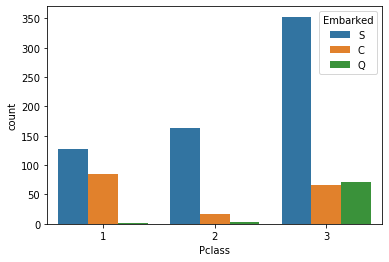

In [12]:
sns.countplot(data=dataset, x='Pclass', hue='Embarked')

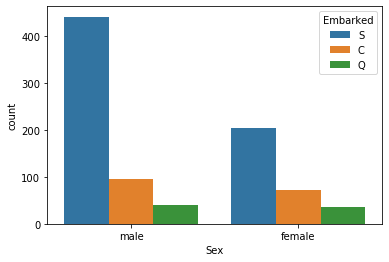

In [13]:
sns.countplot(data = dataset, x='Sex', hue='Embarked')


<p>It seems that not Gender nor class will give us more information about the 'Embarked' feature and the best accuracy that we can get is that 72% with guissing the most common 'Embarked' which is 'S'</p>

In [14]:
dataset.loc[dataset.Embarked.isnull(),'Embarked'] = 'S'



In [15]:
dataset.Embarked.isnull().sum()

0

Now that we took care of missing value, we will examine its relationship with 'Survived'

In [16]:
dataset[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


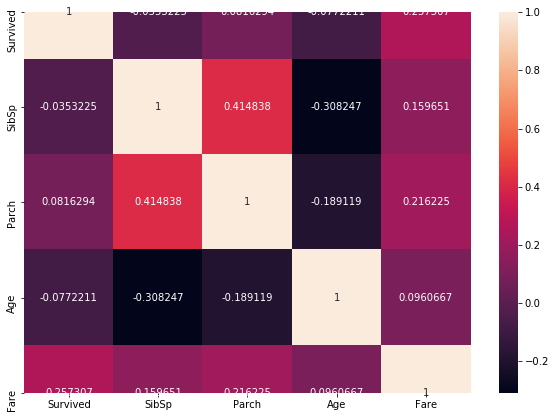

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt='g')

<br/>
<p>Ok, it seems to me that: first 'Fare' has a considerable correlation with survival, and second Parch and SibSp seems to have strong correlation, so I think it is a good idea to combine them into one feature.</p>
</br>



### 'Parch', 'SibSp' and Survival.(Creating 'FamilySize' feature')

<br/>

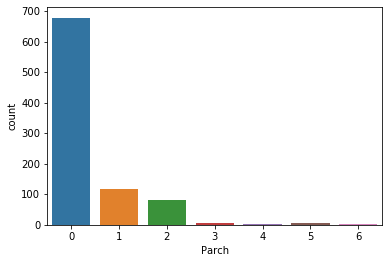

In [18]:
sns.countplot(data=dataset,x='Parch')

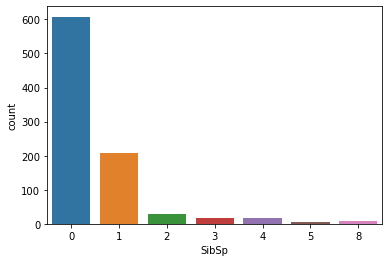

In [19]:
sns.countplot(data=dataset,x='SibSp')

Seems like most of the passengers were travelling alone
<br/>

In [20]:
dataset[['Survived','Parch']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [21]:
dataset[['Survived','SibSp']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000




Since the majority of passengers were travelling alone, Seeing a probability of 35% for these passengers was somehow expected, since the probability of 'Survival' without any extra information is 33%. But it is noticeable that people with 1 or 2 'SibSp' and also people with 1,2 and 3 'Parch' had a noticeably better chance of Survival.





I am still going to merge these two to a single feature 'Familysize', since they were correlated. I will examin the new feature.

######  FamilySize

<br/>

In [22]:
dataset['Familysize'] = dataset.Parch + dataset.SibSp + 1
test_df['Familysize'] = test_df.Parch + test_df.SibSp + 1

In [23]:
dataset[['Familysize', 'Survived']].groupby('Familysize').mean()

,Survived
Familysize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


The result is as expected. Medium size families (2,3,4) has a better chance of survival. Families with more than 7 members almost had no chance. Alone passengers has a slightly less than average chance of survival.

So to sum up, I think categorizing the feature with 4 groups will give us enough information from this feature.

In [24]:
for df in dataFrames:
    df['FamilySize'] = 1
    df.loc[((df.Familysize>1) & (df.Familysize<5)), 'FamilySize'] = 2
    df.loc[((df.Familysize>=5) & (df.Familysize<8)), 'FamilySize'] = 3
    df.loc[((df.Familysize>=8)), 'FamilySize'] = 4

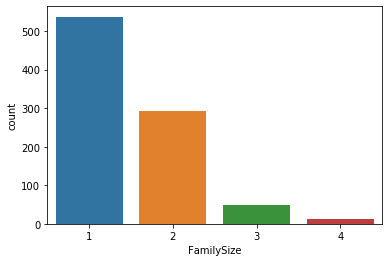

In [25]:
sns.countplot(data=dataset,x='FamilySize')

Since there are not enough occurance of group 4, I will merge it to group 3
<br/>

In [26]:
dataset.loc[((dataset.FamilySize==4)), 'FamilySize'] = 3
test_df.loc[((test_df.FamilySize==4)), 'FamilySize'] = 3

In [27]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [28]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,2


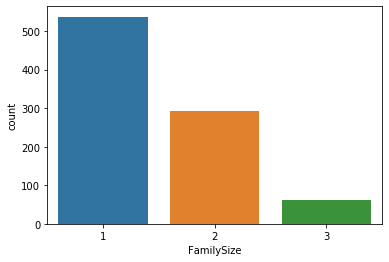

In [29]:
sns.countplot(data=dataset,x = 'FamilySize')

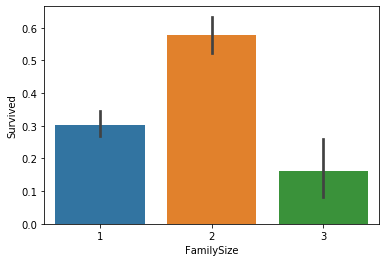

In [30]:
sns.barplot(data=dataset, y='Survived', x='FamilySize')

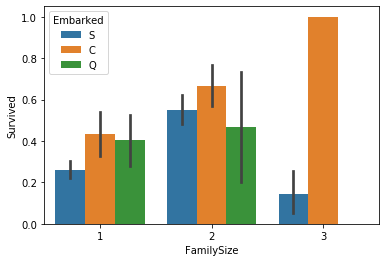

In [31]:
sns.barplot(data=dataset, y='Survived', x='FamilySize', hue='Embarked')

####  Some Extra Visualization with our features

<br/>

<br/>
I drew a ton of plots here, it seems that gender and class are very strong indicators of survival and any three variable comparison with these variables in it won't give us extra information. So I deleted them. Now we can say relationship with more than three variables to see if they teach us more about the situation.
<br/>

/Users/mina/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/mina/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


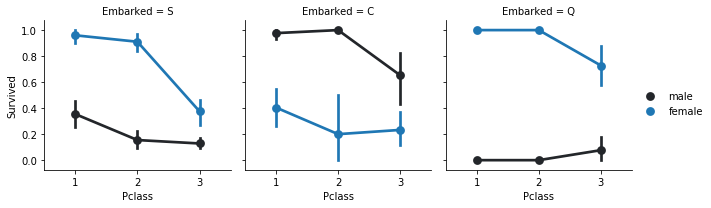

In [32]:
g = sns.FacetGrid(data=dataset, col='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

Seems female in all classes have better chance of survival than men in Embarked='Q' or 'S', but in 'C' male passengers actually have better chance in all classes, though the difference in class 3 seems trivial. Also in Embark'S' the difference between men and women in survival doesn't seem significant.
<br/>

<br/>

/Users/mina/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/mina/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


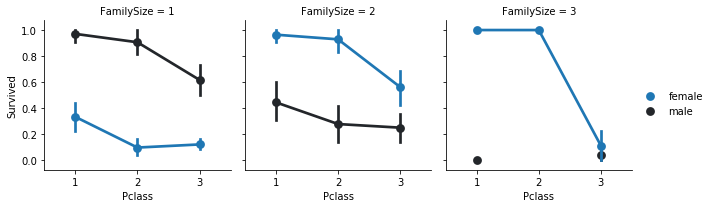

In [33]:
g = sns.FacetGrid(data=dataset, col='FamilySize')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

It seems that between passengers that traveled alone, male passengers actually had a better chance in survival than women in all classes. But in families women had a better chance of survival in all classes, tough the difference in class 3 is not that significant.

<br/>

##   Age and Fare

<h6>First Step:Adressing missing values of Age</h6>
    <p>I think age could be related to class.I think people in higher class usually are older. Also in each class the mean of the age of female passengers probably is less that the mean of the age of male passengers.</p>

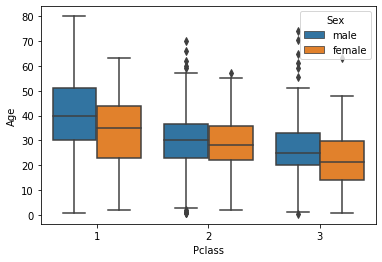

In [34]:

ax = sns.boxplot(x="Pclass", y="Age", hue="Sex",
                 data=dataset)

<br/>
<p>So it seems to me that people in class 1 are older that other groups. There is a little difference in the Age of class 2 and 3 but that does not seem significant. Also the difference in the Age of male and female passengers seem to be significant in class 1 and class 3 subcategories but in class 2 this difference seems to be unsignificant</p>
<br/>
<p>So to make sure my hypothesis are statistically valid, I will test them. So I will perfome an ANOVA test on these six groups with the null hypothesis being that all these groups have the same age mean.</p>

In [35]:
class1Female = np.array(dataset[(dataset.Pclass==1) & (dataset.Sex=='female')]['Age'].dropna())
class1Male = np.array(dataset[(dataset.Pclass==1) & (dataset.Sex=='male')]['Age'].dropna())
class2Female = np.array(dataset[(dataset.Pclass==2) & (dataset.Sex=='male')]['Age'].dropna())
class2Male = np.array(dataset[(dataset.Pclass==2) & (dataset.Sex=='male')]['Age'].dropna())
class3Female = np.array(dataset[(dataset.Pclass==3) & (dataset.Sex=='female')]['Age'].dropna())
class3Male = np.array(dataset[(dataset.Pclass==3) & (dataset.Sex=='male')]['Age'].dropna())


<br/>
<p>For ANOVA test, there are some assuptions that must be met. The samples should be independent.

Each sample is from a normally distributed population. And they should have the same standard deviation. I do'nt see any reason not to believe that the first two assumptions are not met. But for the third one, I wanna quickly check the group's standard deviation.
If they all have standard deviations within the range of 10% from each other, I'd say they have sufficienty close standard deviations.</p>
<br/>

In [36]:
sd1 = np.std(class1Female)
sd2 = np.std(class1Male)
sd3 = np.std(class2Female)
sd4 = np.std(class2Male)
sd5 = np.std(class3Female)
sd6 = np.std(class3Male)
print(np.array([sd1,sd2,sd3,sd4,sd5,sd6]))

minSd = sd1+0.1*sd1
maxSd =sd1 - 0.1*sd1
print([minSd, maxSd])


[13.53174404 15.06443566 14.71898748 14.71898748 12.66740839 12.1354594 ]
[14.884918448948046, 12.178569640048401]


<br/>
<p>Only one of the groups is slightly more deviated than other groups. So I am gonna go with the ANOVA test anyway.</p>
<br/>

In [37]:
from scipy.stats import f_oneway

pval = f_oneway(class1Female,class1Male, class2Female,class2Male, class3Female,class3Male).pvalue

pval


4.813174339358647e-25

<br/>
<p>As we can see the Pvalue of the ANOVA test is way below 0.05. So our null hypothesis is rejected and we can be sure that the age is actually different between atleast two groups.
Now we wanna see what groups are actually statistically different. We will get our answer with Tukey's Range Test</p>
<br/>

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

allGroups = np.concatenate([class1Female, class1Male, class2Female, class2Male, class3Female, class3Male])
labels = ['class1 Female' for i in range(len(class1Female))]+ ['class1 Male' for i in range(len(class1Male))] + ['class2 Female' for i in range(len(class2Female))] + ['class2 Male'for i in range(len(class2Male)) ] + ['class3 Female' for i in range(len(class3Female))] + ['class3 Male'for i in range(len(class3Male))]

tukey_results = pairwise_tukeyhsd(allGroups,labels,0.05)
print(tukey_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
class1 Female   class1 Male   6.6696 0.0114   0.9619  12.3773   True
class1 Female class2 Female  -3.8711 0.3866   -9.605   1.8629  False
class1 Female   class2 Male  -3.8711 0.3866   -9.605   1.8629  False
class1 Female class3 Female -12.8618  0.001 -18.5567  -7.1669   True
class1 Female   class3 Male  -8.1042  0.001 -12.9656  -3.2427   True
  class1 Male class2 Female -10.5407  0.001 -16.0249  -5.0565   True
  class1 Male   class2 Male -10.5407  0.001 -16.0249  -5.0565   True
  class1 Male class3 Female -19.5314  0.001 -24.9747 -14.0881   True
  class1 Male   class3 Male -14.7738  0.001 -19.3379 -10.2097   True
class2 Female   class2 Male      0.0    0.9  -5.5115   5.5115  False
class2 Female class3 Female  -8.9907  0.001 -14.4616  -3.5198   True
class2 Female   class3 Male  -4.23

<br/>
<p> So as we can see the age difference in class1 for male and female is significant. Also in class 3 the difference between men and women's is significant. But in class 2 the difference between men and women is insignificant. 
    
Also it seems that female in class 1 and male in class 3 are more similar to class 2 passengers, But since those two groups are significantly different from each other, I decided to have 4 groups:
    <ul>
        <li>class 1 male</li>
        <li>class 1 female and class 2 passengers</li>
        <li>class 3 male</li>
        <li>class 3 female</li>
    </ul>
</p>
<br/>

<p>Now back to our age column. We have around 180 missing values. we look at their class and  their sex information and then we will fill the missing value with the mean of their group</p>
<br/>

In [39]:
meansToReplace = []
for df in dataFrames:
    group1Mean = df[(df.Pclass==1) & (df.Sex=='male')].Age.mean()
    group2Mean = df[((df.Pclass==1) & (df.Sex=='female')) | (df.Pclass==2)].Age.mean()
    group3Mean = df[(df.Pclass==3) & (df.Sex=='male')].Age.mean()
    group4Mean = df[(df.Pclass==3) & (df.Sex=='female')].Age.mean()
    result = [group1Mean, group2Mean, group3Mean, group4Mean]
    meansToReplace.append(result)
    print(result)

[41.28138613861386, 31.43732558139535, 26.507588932806325, 21.75]
[40.52, 33.208970588235296, 24.525104166666665, 23.073400000000003]


In [40]:
dataset.loc[(dataset.Pclass==1) & (dataset.Sex=='male') & dataset['Age'].isnull(), 'Age'] = meansToReplace[0][0]
dataset.loc[((dataset.Pclass==1) & (dataset.Sex=='female')) | (dataset.Pclass==2) & dataset['Age'].isnull(), 'Age'] = meansToReplace[0][1]
dataset.loc[(dataset.Pclass==3) & (dataset.Sex=='male') & dataset['Age'].isnull(), 'Age'] = meansToReplace[0][2]
dataset.loc[(dataset.Pclass==3) & (dataset.Sex=='female') & dataset['Age'].isnull(), 'Age'] = meansToReplace[0][3]

test_df.loc[(test_df.Pclass==1) & (test_df.Sex=='male') & test_df['Age'].isnull(), 'Age'] = meansToReplace[1][0]
test_df.loc[((test_df.Pclass==1) & (test_df.Sex=='female')) | (test_df.Pclass==2) & test_df['Age'].isnull(), 'Age'] = meansToReplace[1][1]
test_df.loc[(test_df.Pclass==3) & (test_df.Sex=='male') & test_df['Age'].isnull(), 'Age'] = meansToReplace[1][2]
test_df.loc[(test_df.Pclass==3) & (test_df.Sex=='female') & test_df['Age'].isnull(), 'Age'] = meansToReplace[1][3]




In [41]:
dataset.Age.isnull().sum()

0

In [42]:
test_df.Age.isnull().sum()

0

<br/>
<p>Ok, Now we can feel good about our Age feature. There is no missing value here.</p>
<br/>

We continue by exploring Age and Fare

#### Age and Fare

<br/>

(array([ 53.,  41., 198., 357.,  97.,  82.,  34.,  18.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

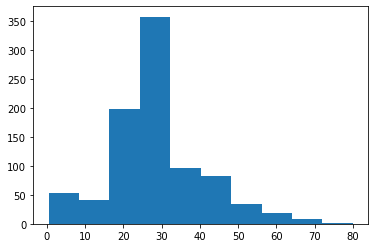

In [43]:

plt.hist(data=dataset, x='Age')


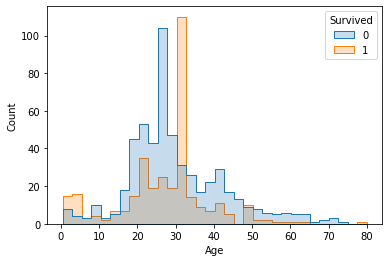

In [44]:
sns.histplot(dataset, x="Age", hue="Survived", element="step")

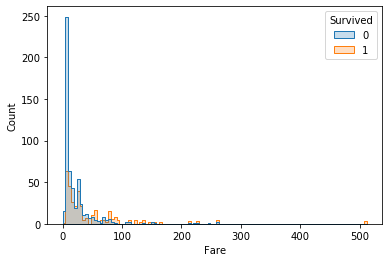

In [45]:
sns.histplot(dataset, x="Fare", hue="Survived", element="step")

In [46]:
dataset['LogFare'] = dataset['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test_df['LogFare'] = test_df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

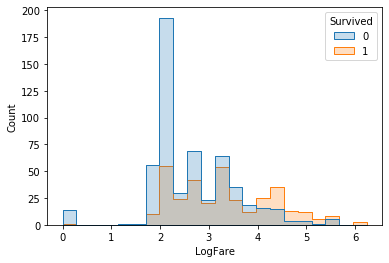

In [47]:
sns.histplot(dataset, x="LogFare", hue="Survived", element="step")

It seems infants and young people(around 30) had a better chance of Survival. Also it seems that high fares are related
to chance of survival.

<br/>
 So it is a good idea to categorize 'Age' and 'Fare'.

In [48]:
dataset['AgeBand'] = pd.cut(dataset.Age, 5)
dataset['FareBand'] = pd.qcut(dataset.LogFare, 4) ## even with applying log 'cut' will result in most passengers in one group

test_df['AgeBand'] = pd.cut(test_df.Age,5)
test_df['FareBand'] = pd.qcut(test_df.LogFare, 4)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,FamilySize,LogFare,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,2,1.981001,"(16.336, 32.252]","(-0.001, 2.068]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,31.437326,1,0,PC 17599,71.2833,C85,C,2,2,4.266662,"(16.336, 32.252]","(3.434, 6.239]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,2.070022,"(16.336, 32.252]","(2.068, 2.671]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,31.437326,1,0,113803,53.1000,C123,S,2,2,3.972177,"(16.336, 32.252]","(3.434, 6.239]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,1,2.085672,"(32.252, 48.168]","(2.068, 2.671]"


In [49]:
dataset[['AgeBand','Survived']].groupby('AgeBand').mean()

,Survived
AgeBand,
"(0.34, 16.336]",0.531915
"(16.336, 32.252]",0.407207
"(32.252, 48.168]",0.284916
"(48.168, 64.084]",0.269231
"(64.084, 80.0]",0.090909


In [50]:
dataset[['FareBand','Survived']].groupby('FareBand').mean()

,Survived
FareBand,
"(-0.001, 2.068]",0.197309
"(2.068, 2.671]",0.303571
"(2.671, 3.434]",0.454955
"(3.434, 6.239]",0.581081


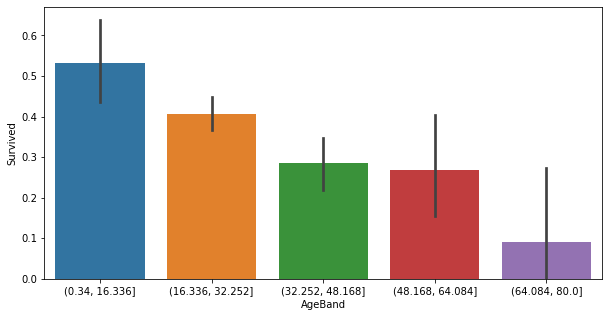

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(data=dataset,y='Survived',x='AgeBand')
plt.xticks = [1,2,3,4,5]

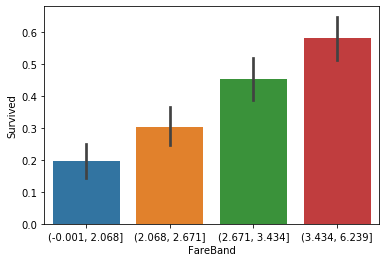

In [52]:
sns.barplot(data=dataset,y='Survived',x='FareBand')

In [53]:
pd.crosstab(dataset.FareBand,dataset.Survived)

Survived,0,1
FareBand,,
"(-0.001, 2.068]",179,44
"(2.068, 2.671]",156,68
"(2.671, 3.434]",121,101
"(3.434, 6.239]",93,129


Now to make our table more clean. I want to drop 'Age','Fare','Familysize','LogFare', 'Parch' and 'SibSp'

<br/>

In [54]:
columns = ['Age','Fare','LogFare','Familysize','Parch','SibSp']
dataset.drop(columns,axis=1,inplace=True)
test_df.drop(columns,axis=1,inplace=True)

In [55]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked,FamilySize,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,2,"(16.336, 32.252]","(-0.001, 2.068]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,2,"(16.336, 32.252]","(3.434, 6.239]"
2,3,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,1,"(16.336, 32.252]","(2.068, 2.671]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,2,"(16.336, 32.252]","(3.434, 6.239]"
4,5,0,3,"Allen, Mr. William Henry",male,373450,NaN,S,1,"(32.252, 48.168]","(2.068, 2.671]"


## Name, Ticket and Cabin

<br/>

In [56]:
dataset[['Name','Ticket','Cabin']].describe()

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Hansen, Mr. Henrik Juul",347082,B96 B98
freq,1,7,4


In [57]:
dataset[['Name','Ticket','Cabin']].head(10)

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,NaN
5,"Moran, Mr. James",330877,NaN
6,"McCarthy, Mr. Timothy J",17463,E46
7,"Palsson, Master. Gosta Leonard",349909,NaN
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",347742,NaN
9,"Nasser, Mrs. Nicholas (Adele Achem)",237736,NaN


<br/>
It seems that we can extract a 'Title' feature, out of Name. also cabin names seem to start with a letter, maybe that could be indicator of something. For ticket I cannot think of any value that we can get out of it right now, except it seems people share a ticket sometimes.

In [58]:
dataset['Title'] = dataset.Name.apply(lambda name: name.split(', ')[1].split('.')[0])
test_df['Title'] = test_df.Name.apply(lambda name:name.split(', ')[1].split('.')[0])

In [59]:
dataset['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Sir               1
Capt              1
Ms                1
Jonkheer          1
the Countess      1
Lady              1
Mme               1
Name: Title, dtype: int64

In [60]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

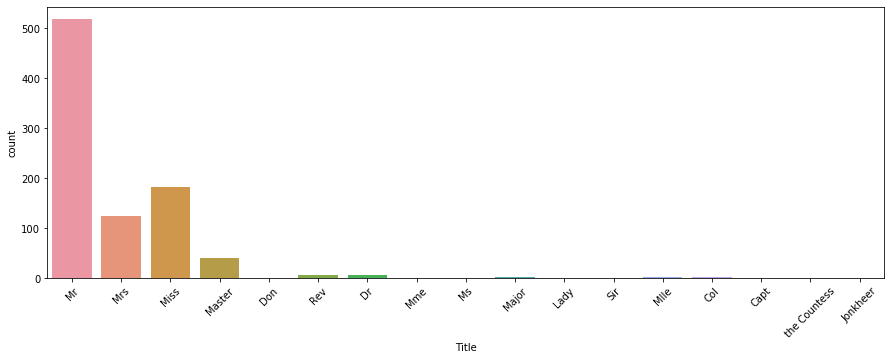

In [61]:
plt.figure(figsize = (15,5))
g = sns.countplot(data=dataset, x='Title')
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [62]:
for df in dataFrames:
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Dona'], 'Rare')

In [63]:
test_df.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [64]:
dataset['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [65]:
dataset[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


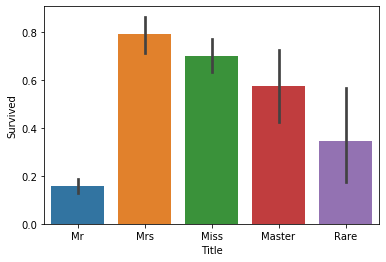

In [66]:
sns.barplot(data=dataset,x='Title',y='Survived')

There is so surprise here, titles associated with womwn and children indicates better chance of survival than titles associated with men.

<br/>

###### Cabin

<br/>

In [67]:
dataset["Cabin"].isnull().sum()

687

In [68]:
dataset[dataset["Cabin"].notnull()]['Cabin'].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [69]:
for df in dataFrames:
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'X'
    df['CabinLetter'] = df.Cabin.apply(lambda cabin:cabin[0])

In [70]:
dataset['CabinLetter'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinLetter, dtype: int64

In [71]:
dataset[['CabinLetter', 'Survived']].groupby('CabinLetter').mean()

,Survived
CabinLetter,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
X,0.299854


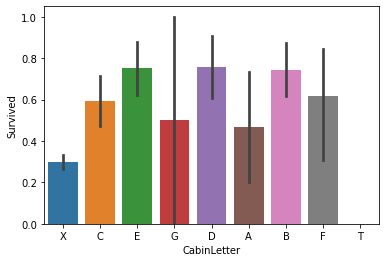

In [72]:
sns.barplot(data=dataset,x='CabinLetter',y='Survived')

Because majority of passengers did'nt have a cabin number and between those the categories we have is a lot, we see a lot of standard deviationin most categories. So we cannot come to any significant conculusion. But we can see people with a cabin in general had a better chance of survival

<br/>

###### Ticket

<br/>

In [73]:
dataset['Ticket'].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [74]:
dataset[['Ticket','Cabin']].head(20)

,Ticket,Cabin
0,A/5 21171,X
1,PC 17599,C85
2,STON/O2. 3101282,X
3,113803,C123
4,373450,X
5,330877,X
6,17463,E46
7,349909,X
8,347742,X
9,237736,X


I cannot make any consulusion about the 'Ticket' feature. I cannot see any pattern in the feature itself, and also I thaught maybe cabin and ticket could be related and I can draw a conclusion about Ticket based on the cabin information, but I cannot see how cabin could give us any information about ticket. So all in all, I decided drop ticket altogether. 

<br/>

I am done with 'Name' and 'Cabin', so now I drop them from dataframe too.

In [75]:
dataset.drop(['Ticket','Name','Cabin'],axis=1,inplace=True)
test_df.drop(['Ticket', 'Name', 'Cabin'], axis=1, inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,AgeBand,FareBand,Title,CabinLetter
0,1,0,3,male,S,2,"(16.336, 32.252]","(-0.001, 2.068]",Mr,X
1,2,1,1,female,C,2,"(16.336, 32.252]","(3.434, 6.239]",Mrs,C
2,3,1,3,female,S,1,"(16.336, 32.252]","(2.068, 2.671]",Miss,X
3,4,1,1,female,S,2,"(16.336, 32.252]","(3.434, 6.239]",Mrs,C
4,5,0,3,male,S,1,"(32.252, 48.168]","(2.068, 2.671]",Mr,X


In [76]:
test_df.head()

,PassengerId,Pclass,Sex,Embarked,FamilySize,AgeBand,FareBand,Title,CabinLetter
0,892,3,male,Q,1,"(26.902, 40.268]","(-0.001, 2.066]",Mr,X
1,893,3,female,S,2,"(40.268, 53.634]","(-0.001, 2.066]",Mrs,X
2,894,2,male,Q,1,"(53.634, 67.0]","(2.066, 2.671]",Mr,X
3,895,3,male,S,1,"(26.902, 40.268]","(2.066, 2.671]",Mr,X
4,896,3,female,S,2,"(13.536, 26.902]","(2.066, 2.671]",Mrs,X


## converting categorical data into dummy data

<br/>

In [77]:

dataset = pd.get_dummies(dataset, columns = ["CabinLetter"], prefix="Cabin")
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Embarked")
dataset = pd.get_dummies(dataset, columns = ["Sex"], prefix="Sex")
dataset = pd.get_dummies(dataset, columns = ["Title"], prefix="Title")

In [78]:
dataset.head()

,PassengerId,Survived,Pclass,FamilySize,AgeBand,FareBand,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,2,"(16.336, 32.252]","(-0.001, 2.068]",0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,2,1,1,2,"(16.336, 32.252]","(3.434, 6.239]",0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,3,1,3,1,"(16.336, 32.252]","(2.068, 2.671]",0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,4,1,1,2,"(16.336, 32.252]","(3.434, 6.239]",0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,5,0,3,1,"(32.252, 48.168]","(2.068, 2.671]",0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [79]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'FamilySize', 'AgeBand',
       'FareBand', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

<br/>

In [80]:
test_df = pd.get_dummies(test_df, columns = ["CabinLetter"], prefix="Cabin")
test_df = pd.get_dummies(test_df, columns = ["Embarked"], prefix="Embarked")
test_df = pd.get_dummies(test_df, columns = ["Sex"], prefix="Sex")
test_df = pd.get_dummies(test_df, columns = ["Title"], prefix="Title")

In [81]:
test_df.head()

,PassengerId,Pclass,FamilySize,AgeBand,FareBand,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,1,"(26.902, 40.268]","(-0.001, 2.066]",0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,893,3,2,"(40.268, 53.634]","(-0.001, 2.066]",0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,894,2,1,"(53.634, 67.0]","(2.066, 2.671]",0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,895,3,1,"(26.902, 40.268]","(2.066, 2.671]",0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,896,3,2,"(13.536, 26.902]","(2.066, 2.671]",0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


 Now the data is ready for modelling.

## MODEL DATA

<br/>